# Problem description
`lh_oaflux_1958-2016.nc` and `sh_oaflux_1958-2016.nc` are latent and sensible surface heat flux from the Objectively Analyzed Surface Heat Flux (oaflux) data downloaded from [https://oaflux.whoi.edu](https://oaflux.whoi.edu), in netCDF format. Compute and plot globally averaged annual mean latent and sensitive heat fluxes as a time series in unit of $w/m^2$.  Then compute the time mean value and standard deviation of latent and sensitive heat fluxes.  How do these values compare to the absorbed solar radiation of 240 $Wm^{-2}$ (assuming a planetary albedo of $\alpha=0.3$)?

# Python code
I use Python to read data and make graphs.

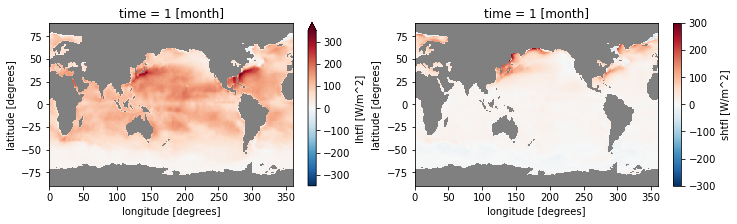

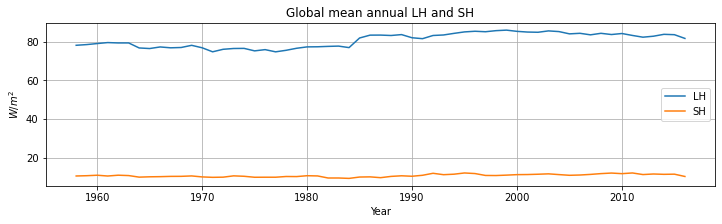

LH mean: 80.90 W/m^2, std: 3.62 W/m^2
SH mean: 10.65 W/m^2, std: 0.71 W/m^2


In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
# Load the data from the netCDF file
lh_ds = xr.open_dataset("lh_oaflux_1958-2016.nc")
sh_ds = xr.open_dataset("sh_oaflux_1958-2016.nc")
lh_da = lh_ds["lhtfl"]
sh_da = sh_ds["shtfl"]
# set land value to nan
lh_da.data[lh_da.data > 3276] = np.nan
# plot the first month map to check if the data are read correctly, set nan value to grey
f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
cm = plt.get_cmap("RdBu_r").copy()
cm.set_bad(color="grey")
lh_da[0].plot(ax=ax1, cmap=cm, vmin=-350, vmax=350)
sh_da[0].plot(ax=ax2, cmap=cm, vmin=-300, vmax=300)
# calculate the global annual mean, skip nan values
lh_mean = lh_da.mean(dim=["lat", "lon"], skipna=True)
lh_annual = lh_mean.data.reshape(-1, 12).mean(axis=1).flatten()
sh_mean = sh_da.mean(dim=["lat", "lon"], skipna=True)
sh_annual = sh_mean.data.reshape(-1, 12).mean(axis=1).flatten()
# plot the global mean time series
f2, ax = plt.subplots(1, 1, figsize=(12, 3))
time = np.arange(1958, 2017)
ax.plot(time, lh_annual, label="LH")
ax.plot(time, sh_annual, label="SH")
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("$W/m^2$")
ax.set_title("Global mean annual LH and SH")
ax.grid()
plt.show()
# compute the time mean value and standard deviation
print("LH mean: {:.2f} W/m^2, std: {:.2f} W/m^2".format(lh_annual.mean(), lh_annual.std()))
print("SH mean: {:.2f} W/m^2, std: {:.2f} W/m^2".format(sh_annual.mean(), sh_annual.std()))

# Analysis
Time mean and standard deviation of latent and sensible heat flux are shown above. Compared to the absorbed solar radiation of 240 $Wm^{-2}$, they are much smaller.